# Boston Housing Linear regression

**Importing all the necessary libraries to manipulate and extract necessary data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing dataset from sklearn**

In [2]:
from sklearn.datasets import load_boston

In [3]:
import warnings
warnings.filterwarnings('ignore')
boston_data = load_boston()

**Exploring the dataset**

In [4]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Creating a dataframe**

In [6]:
df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names )

In [7]:
df_boston['MEDV']=pd.Series(boston_data.target)

**Exploring the dataframe creating**

In [8]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Creating a heatmap of the correlation of the dataframe**

<AxesSubplot:>

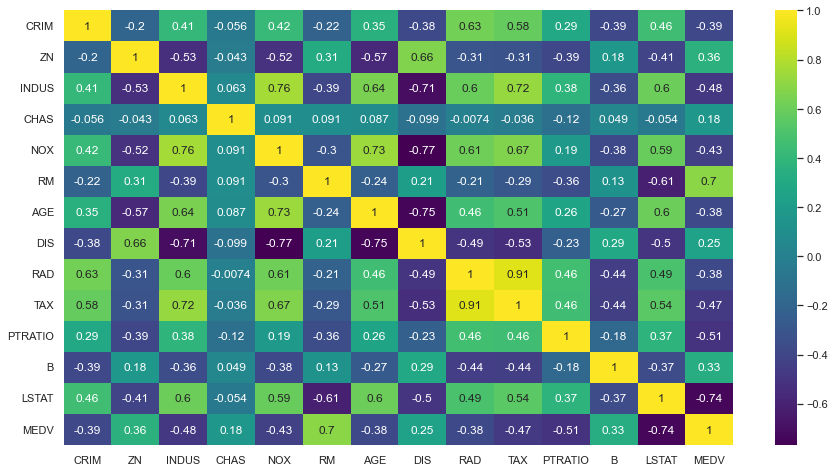

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df_boston.corr(),annot=True,cmap='viridis')

**Understanding the distribution of target column [MEDV]**

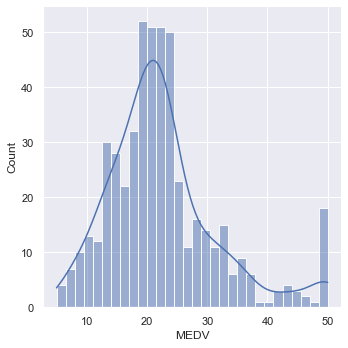

In [12]:
sns.displot(df_boston['MEDV'],bins=30,kde=True)

## Training Data

In [13]:
X = df_boston[['LSTAT','RM']]
y=df_boston['MEDV']

Importing train test split to split the available data for developing our model

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Selecting appropriate algorithm for analysis**

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Coefficient: \n',lm.coef_)

Coefficient: 
 [-0.67306116  4.63603336]


In [20]:
prediction = lm.predict(X_test)
y_train_predict = lm.predict(X_train)

Text(0.5, 0, 'Y test')

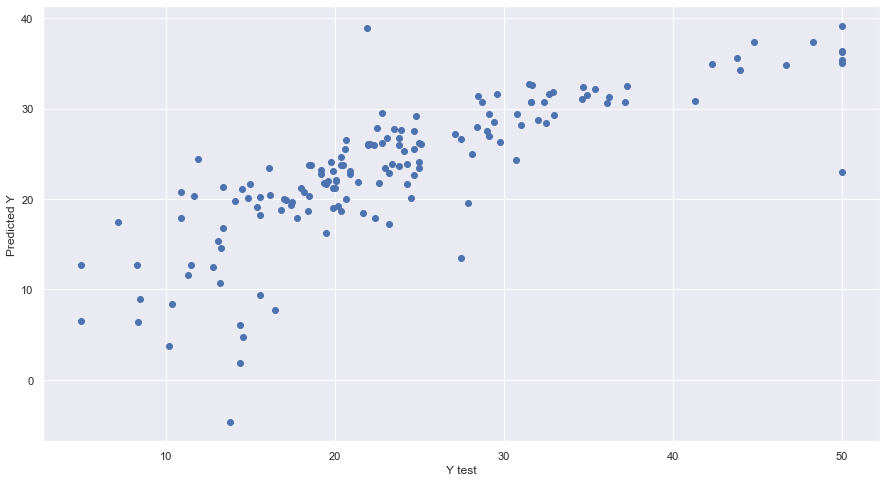

In [21]:
plt.scatter(y_test,prediction)
plt.ylabel('Predicted Y')
plt.xlabel('Y test')

## Evaluating Model

In [22]:
from sklearn import metrics

In [23]:
print("Model performance for training set")
print('MAE: ',metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE: ',metrics.mean_squared_error(y_train,y_train_predict))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))

Model performance for training set
MAE:  3.771931604800682
MSE:  28.046075462980873
RMSE:  5.295854554553106


In [24]:
print('Model performance for test set')
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Model performance for test set
MAE:  4.380474756133434
MSE:  36.54113133122373
RMSE:  6.044926081535136


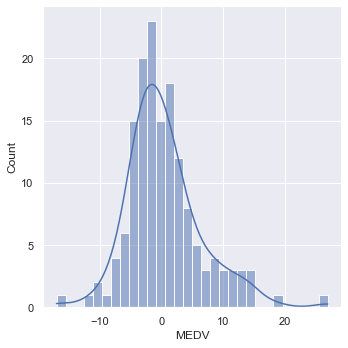

In [25]:
sns.displot((y_test-prediction),kde=True,bins=30)

In [26]:
df = pd.DataFrame(lm.coef_,X.columns)
df.columns = ['Coefficient']
df

,Coefficient
LSTAT,-0.673061
RM,4.636033
